# Shai_Assignment

# Basic Data Exploration :

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Load your dataset
df = pd.read_csv('Salaries.csv')

Identify the number of rows and columns in the dataset.

In [2]:
R=df.iloc[:, 0].count()
C=df.iloc[0].isnull().count()
print('The number of rows is:',R)
print('The number of columns is:',C)

The number of rows is: 148654
The number of columns is: 13


Determine the data types of each column.

In [3]:
types_of_cols = df.dtypes
types_of_cols

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

Check for missing values in each column.

In [4]:
cols_have_missing_values=df.isna().any()
cols_have_missing_values

Id                  False
EmployeeName        False
JobTitle            False
BasePay              True
OvertimePay          True
OtherPay             True
Benefits             True
TotalPay            False
TotalPayBenefits    False
Year                False
Notes                True
Agency              False
Status               True
dtype: bool

In [5]:
empty_cols=df.isna().all()
empty_cols

Id                  False
EmployeeName        False
JobTitle            False
BasePay             False
OvertimePay         False
OtherPay            False
Benefits            False
TotalPay            False
TotalPayBenefits    False
Year                False
Notes                True
Agency              False
Status               True
dtype: bool

The "Notes" and "Status" columns are empty(filled with NaN), while the "BasePay", "OvertimePay","OtherPay" and "Benefits" columns have some missing values.

# Descriptive Statistics:

Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries.

In [6]:
mean, median, mod, min, max, rnge =[df['TotalPay'].mean(),
                                     df['TotalPay'].median(),
                                     df['TotalPay'].mode(),
                                     df['TotalPay'].min(),
                                     df['TotalPay'].max(),
                                     df['TotalPay'].max()-df['TotalPay'].min()]
print(f'mean: {mean}\nmedian: {median}\n\nmode: {mod}\n\nminimum salary: {min}\nmaximum salary: {max}\nrange: {rnge}')

mean: 74768.32197169267
median: 71426.60999999999

mode: 0    0.0
Name: TotalPay, dtype: float64

minimum salary: -618.13
maximum salary: 567595.43
range: 568213.56


A negative minimum salary implies that the range of salary exceeds the maximum salary, which is illogical. This suggests a data error or an unusual situation.

# Data Cleaning:

Handle missing data by suitable method with explain why you use it.

Since the ‘Notes’ and ‘Status’ columns have no values, I will remove them.

In [7]:
df.drop(['Notes','Status' ],axis=1,inplace=True)
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco


To handle missing values, I use different methods for different columns. I fill the NaN values of Benefits, OvertimePay, and OtherPay with zeros. I fill the NaN values of BasePay with the mean BasePay.

In [8]:
new_values={                              
                "Benefits" : 0.0 , 
                "BasePay" : df["BasePay"].mean() ,
                "OvertimePay" : 0.0 ,
                "OtherPay" : 0.0 }
df = df.fillna(new_values)

# Basic Data Visualization:

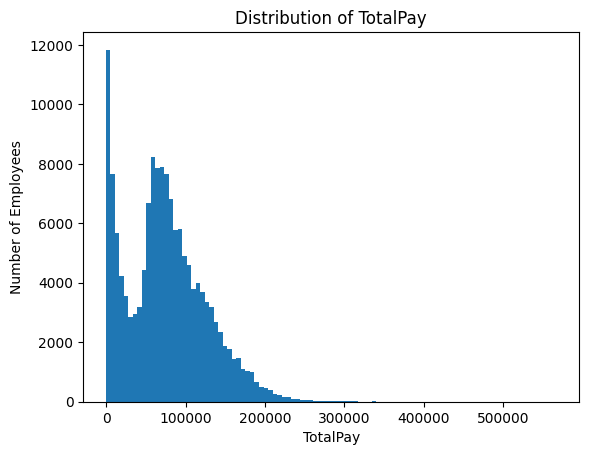

In [9]:
s = df['TotalPay'].tolist()

plt.hist(s,100)
plt.xlabel('TotalPay', color='black')
plt.ylabel('Number of Employees', color='black')
plt.title('Distribution of TotalPay')
plt.show() 

In [10]:
# extract the department from the job title
df['Department'] = df['JobTitle'].str.extract('\((.*)\)', expand=False)


df['Department'] = df['Department'].fillna('Other Departments')

unique_departments = df['Department'].unique()
unique_departments

array(['Other Departments', 'POLICE DEPARTMENT', 'FIRE DEPARTMENT',
       'CIVIL & CRIMINAL', 'CIVIL/CRIMINAL', 'MFCC', 'SEASONAL',
       'Fire Dept', 'Cvl&Crmnl', 'Civil & Criminal', 'SFERS',
       'Police Department', 'Civil/Criminal', 'Seasonal',
       'Fire Department'], dtype=object)

In [11]:
df.loc[df["Department"].isin(["Civil/Criminal", "Civil & Criminal", "CIVIL & CRIMINAL","Cvl&Crmnl","CIVIL/CRIMINAL"]), "Department"] = "CIVIL & CRIMINAL"
df.loc[df["Department"].isin(["POLICE DEPARTMENT", "Police Department"]), "Department"] = "POLICE DEPARTMENT"
df.loc[df["Department"].isin(["FIRE DEPARTMENT", "Fire Department","Fire Dept"]), "Department"] = "FIRE DEPARTMENT"
df.loc[df["Department"].isin(["Seasonal", "SEASONAL"]), "Department"] = "SEASONAL"



In [12]:
fraction={}
fraction["Other Departments"]=len(df[(df['Department']=='Other Departments')] )/  len(df["Department"])
fraction["POLICE DEPARTMENT"]=len(df[df['Department']=='POLICE DEPARTMENT'] )/  len(df["Department"])
fraction["FIRE DEPARTMENT"]=len(df[df['Department']=='FIRE DEPARTMENT'] )/  len(df["Department"])
fraction["CIVIL & CRIMINAL"]=len(df[df['Department']=='CIVIL & CRIMINAL'] )/  len(df["Department"])
fraction["SFERS"]=len(df[(df['Department']=='SFERS')] )/  len(df["Department"])
fraction["Seasonal"]=len(df[(df['Department']=='SEASONAL')] )/  len(df["Department"])
fraction["MFCC"]=len(df[(df['Department']=='MFCC')] )/  len(df["Department"])
fraction

{'Other Departments': 0.9825500827424758,
 'POLICE DEPARTMENT': 0.004789645754571017,
 'FIRE DEPARTMENT': 0.0005247083832254766,
 'CIVIL & CRIMINAL': 0.01031926487010104,
 'SFERS': 0.0004305299554670577,
 'Seasonal': 0.0007803355442840422,
 'MFCC': 0.0006054327498755499}

The other Departments accounts for 98.3% of the data, so I will exclude them from the figure.

([<matplotlib.patches.Wedge at 0x1f5f2c4c350>,
 [Text(0.7157593973618306, 0.8352774898728142, 'POLICE DEPARTMENT'),
  Text(-0.27030611249664205, 1.0662713564318198, 'FIRE DEPARTMENT'),
  Text(-0.8889778558639347, -0.6478567525183029, 'CIVIL & CRIMINAL'),
  Text(0.922223406477865, -0.5995865146451869, 'SFERS'),
  Text(1.0300724084715365, -0.3859414894846737, 'Seasonal'),
  Text(1.093472110280153, -0.119660954531832, 'MFCC')],
 [Text(0.3904142167428166, 0.45560590356698955, '27.4%'),
  Text(-0.1474396977254411, 0.5816025580537197, '3.0%'),
  Text(-0.48489701228941884, -0.3533764104645288, '59.1%'),
  Text(0.5030309489879263, -0.3270471898064655, '2.5%'),
  Text(0.5618576773481107, -0.2105135397189129, '4.5%'),
  Text(0.5964393328800834, -0.06526961156281744, '3.5%')])

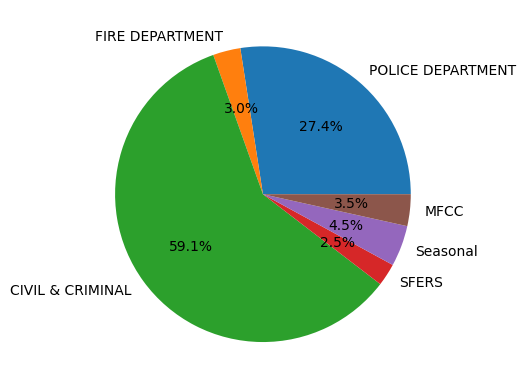

In [13]:
names = []
values = []
for key,value in fraction.items():
    names.append(key)
    values.append(value)
fig, ax = plt.subplots()
ax.pie(values[1:], labels=names[1:], autopct='%.1f%%')

# Grouped Analysis:

Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [14]:
df.groupby(by='Year').agg({'TotalPay':['mean','median','min','max','count']})

TotalPay                                     
              mean     median     min        max  count
Year                                                   
2011  71744.103871  68213.240    0.00  567595.43  36159
2012  74113.262265  70714.680    0.00  362844.66  36766
2013  77611.443142  74500.015    0.00  347102.32  37606
2014  75463.918140  72359.980 -618.13  471952.64  38123

The average salaries reached its peak in 2013 and its trough in 2011. The minimum salary was usually 0.0, except for 2014, when it was -618.13, a negative value.

# Simple Correlation Analysis: 
Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

In [15]:
df["OtherPay"].corr(df["TotalPay"])

0.4704987725357748

There is a fair correlation between The OtherPay and TotalPay

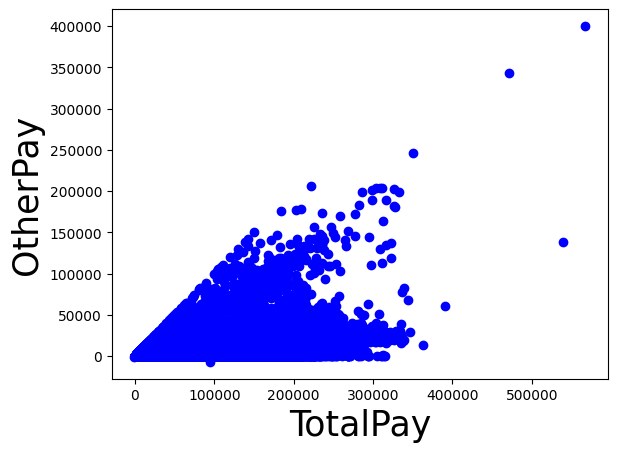

In [16]:
plt.scatter(df['TotalPay'],df['OtherPay'],color = 'blue')
plt.xlabel("TotalPay", color = 'black', size = 25)
plt.ylabel("OtherPay", color = 'black', size = 25)
plt.show()

In [17]:
df["Benefits"].corr(df["TotalPay"])

0.6322018839186374

Here we have a strong positive correlation between TotalPay(Salary) and Benefits.

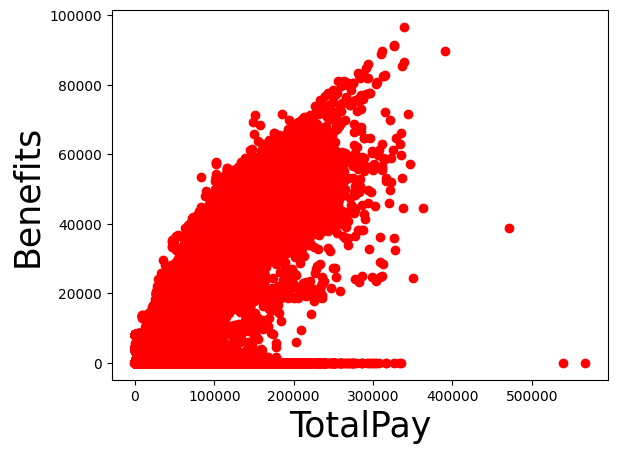

In [18]:
plt.scatter(df['TotalPay'],df['Benefits'],color = 'red')
plt.xlabel("TotalPay", color = 'black', size = 25)
plt.ylabel("Benefits", color = 'black', size = 25)
plt.show()

# Summary of Insights
Write a brief report summarizing the findings and insights from the analyses:

The distribution of salary is $right-skewed$, meaning that most of the employees have lower salary than the average, and only a few have very high salary. The median TotalPay is **71426.61**, which is lower than the mean totalPay **74768.32**, indicating the skewness.

The minimum salary is **-618.13**, which indicates some data entry errors, and the maximum salary is **$567,595.43**, which belongs to Nathaniel Ford, the general manager of the metropolitan transit authority in 2011.

It is unrealistic to have a significant number of employees with a BasePay of 0.0, as this implies that they rely entirely on otherPay and Benefits. A more reasonable assumption is that every employee has a BasePay **bigger than zero**.

The only agency in the data is **San Francisco**, which means that the data is not diverse or comprehensive enough to compare with other agencies or locations